In [53]:
from IPython.display import display
import numpy as np
import pandas as pd
import folium
import plotly.express as px
import seaborn as sns

In [54]:
data_bars = pd.read_csv('../../data/osm-fr-bars.csv', sep=';')

display(data_bars)

Geo Point                    Nom Boissons  \
0                44.0549704,0.2603921           Au boin coin      NaN   
1                47.9094426,1.9076031      Le Diabolo Menthe      NaN   
2                 48.8020856,2.427514        Café de la Gare      NaN   
3                41.6976671,9.0644945                    NaN      NaN   
4                 43.788717,4.8299152  Brasserie du Commerce      yes   
...                               ...                    ...      ...   
17928            44.2761336,5.2758837           Les Glycines      NaN   
17929            46.7227908,2.5037666             La Rotonde      NaN   
17930            43.8339541,4.3534613              La Movida      NaN   
17931            46.7776345,4.8488139         Nicéphore Café      NaN   
17932  43.3685096,-1.7927453999999998                   Uxoa      NaN   

      Site web          Téléphone Horaires Accessible PMR PMR (description)  \
0          NaN  +33 5 53 65 67 45      NaN            NaN               NaN   
1          NaN                NaN      NaN            NaN               NaN   
2          NaN                NaN      NaN            NaN               NaN   
3          NaN                NaN      NaN            NaN               NaN   
4          NaN                NaN      NaN            NaN               NaN   
...        ...                ...      ...            ...               ...   
17928      NaN                NaN      NaN            NaN               NaN   
17929      NaN     +33 2 48961610      NaN            NaN               NaN   
17930      NaN                NaN      NaN            NaN               NaN   
17931      NaN                NaN      NaN            NaN               NaN   
17932      NaN                NaN      NaN            NaN               NaN   

      Toilettes PMR Id Wikidata Id Wikipédia Code postal  \
0               NaN         NaN          NaN         NaN   
1               NaN         NaN          NaN         NaN   
2               NaN         NaN          NaN         NaN   
3               NaN         NaN          NaN         NaN   
4               NaN         NaN          NaN       13210   
...             ...         ...          ...         ...   
17928           NaN         NaN          NaN         NaN   
17929           NaN         NaN          NaN         NaN   
17930           NaN         NaN          NaN         NaN   
17931           NaN         NaN          NaN         NaN   
17932           NaN         NaN          NaN         NaN   

                                              other_tags  
0      {"cuisine": "tapas", "ref:FR:CRTA": "RESAQU047...  
1                                   {"source": "survey"}  
2                                                    NaN  
3                                                    NaN  
4      {"addr:housenumber": "22", "addr:city": "Saint...  
...                                                  ...  
17928                                                NaN  
17929                                                NaN  
17930                                                NaN  
17931                                                NaN  
17932                                                NaN  

[17933 rows x 13 columns]

In [55]:
data_bars = data_bars[["Geo Point", "Code postal", "Nom"]]

display(data_bars)
print("Rate of undefined values:", data_bars["Code postal"].isna().sum() / len(data_bars["Code postal"]))

Geo Point Code postal                    Nom
0                44.0549704,0.2603921         NaN           Au boin coin
1                47.9094426,1.9076031         NaN      Le Diabolo Menthe
2                 48.8020856,2.427514         NaN        Café de la Gare
3                41.6976671,9.0644945         NaN                    NaN
4                 43.788717,4.8299152       13210  Brasserie du Commerce
...                               ...         ...                    ...
17928            44.2761336,5.2758837         NaN           Les Glycines
17929            46.7227908,2.5037666         NaN             La Rotonde
17930            43.8339541,4.3534613         NaN              La Movida
17931            46.7776345,4.8488139         NaN         Nicéphore Café
17932  43.3685096,-1.7927453999999998         NaN                   Uxoa

[17933 rows x 3 columns]

Rate of undefined values: 0.8377850889421736


Since the rate of undefined value is way higher than 0.5, and that GPS coordinates and postal code are a little redundant, we can reasonably delete Code postal column:

In [56]:
data_bars.drop("Code postal", axis=1, inplace=True)
data_bars

Geo Point                    Nom
0                44.0549704,0.2603921           Au boin coin
1                47.9094426,1.9076031      Le Diabolo Menthe
2                 48.8020856,2.427514        Café de la Gare
3                41.6976671,9.0644945                    NaN
4                 43.788717,4.8299152  Brasserie du Commerce
...                               ...                    ...
17928            44.2761336,5.2758837           Les Glycines
17929            46.7227908,2.5037666             La Rotonde
17930            43.8339541,4.3534613              La Movida
17931            46.7776345,4.8488139         Nicéphore Café
17932  43.3685096,-1.7927453999999998                   Uxoa

[17933 rows x 2 columns]

In [57]:
latitudes = []
longitudes = []

for row in data_bars['Geo Point']:
    try:
        latitudes.append(row.split(',')[0])
        longitudes.append(row.split(',')[1])
    except:
        latitudes.append(np.NaN)
        longitudes.append(np.NaN)

data_bars['Latitude'] = latitudes
data_bars['Longitude'] = longitudes
data_bars.drop('Geo Point', 1)

/var/folders/97/y6ldl6694d978551pjfjtq8m0000gn/T/ipykernel_8437/1849365207.py:14: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



Nom    Latitude            Longitude
0               Au boin coin  44.0549704            0.2603921
1          Le Diabolo Menthe  47.9094426            1.9076031
2            Café de la Gare  48.8020856             2.427514
3                        NaN  41.6976671            9.0644945
4      Brasserie du Commerce   43.788717            4.8299152
...                      ...         ...                  ...
17928           Les Glycines  44.2761336            5.2758837
17929             La Rotonde  46.7227908            2.5037666
17930              La Movida  43.8339541            4.3534613
17931         Nicéphore Café  46.7776345            4.8488139
17932                   Uxoa  43.3685096  -1.7927453999999998

[17933 rows x 3 columns]

Number of missing values

In [58]:
data_bars.isnull().sum().sum()
data_bars

Geo Point                    Nom    Latitude  \
0                44.0549704,0.2603921           Au boin coin  44.0549704   
1                47.9094426,1.9076031      Le Diabolo Menthe  47.9094426   
2                 48.8020856,2.427514        Café de la Gare  48.8020856   
3                41.6976671,9.0644945                    NaN  41.6976671   
4                 43.788717,4.8299152  Brasserie du Commerce   43.788717   
...                               ...                    ...         ...   
17928            44.2761336,5.2758837           Les Glycines  44.2761336   
17929            46.7227908,2.5037666             La Rotonde  46.7227908   
17930            43.8339541,4.3534613              La Movida  43.8339541   
17931            46.7776345,4.8488139         Nicéphore Café  46.7776345   
17932  43.3685096,-1.7927453999999998                   Uxoa  43.3685096   

                 Longitude  
0                0.2603921  
1                1.9076031  
2                 2.427514  
3                9.0644945  
4                4.8299152  
...                    ...  
17928            5.2758837  
17929            2.5037666  
17930            4.3534613  
17931            4.8488139  
17932  -1.7927453999999998  

[17933 rows x 4 columns]

Let's just see that on a map

In [59]:
postalCodes = pd.read_csv('../../data/postal-code.csv', usecols=['01400', '46.147624', '4.923727'], dtype={'01400': str, '46.147624': np.float64, '4.923727': np.float64} )
postalCodes

01400  46.147624   4.923727
0         01400  46.147812   4.924310
1         01400  46.146756   4.924307
2         01400  46.146907   4.924547
3         01400  46.147154   4.924191
4         01400  46.147307   4.924624
...         ...        ...        ...
22845076  97680 -12.790557  45.137112
22845077  97680 -12.789817  45.132364
22845078  97680 -12.788548  45.132566
22845079  97680 -12.789423  45.103516
22845080  97680 -12.788577  45.102423

[22845081 rows x 3 columns]

In [60]:
postalCodes.columns = ['Postal code', 'Latitude', 'Longitude']
postalCodes

Postal code   Latitude  Longitude
0              01400  46.147812   4.924310
1              01400  46.146756   4.924307
2              01400  46.146907   4.924547
3              01400  46.147154   4.924191
4              01400  46.147307   4.924624
...              ...        ...        ...
22845076       97680 -12.790557  45.137112
22845077       97680 -12.789817  45.132364
22845078       97680 -12.788548  45.132566
22845079       97680 -12.789423  45.103516
22845080       97680 -12.788577  45.102423

[22845081 rows x 3 columns]

Le meilleur compromis d'arrondi des coordonnées GPS est de 3 car pour un arrondi de 4 nous obtenons 16749 valeurs non trouvées et en dessous de 3 la précision est trop faible : on peut obtenir un code postal erroné. Nous aurions pu faire un appel à une API pour avoir des valeurs exacte facilement, mais nous trouvions que c'était moins dans l'esprit du projet.
9859; 1524; 617;

In [61]:
postalCodes['Latitude'] = postalCodes['Latitude'].apply(lambda lat: round(lat, 3))
postalCodes['Longitude'] = postalCodes['Longitude'].apply(lambda long: round(long, 3))

data_bars['Latitude'] = data_bars['Latitude'].astype(float)
data_bars['Longitude'] = data_bars['Longitude'].astype(float)
data_bars['Latitude'] = data_bars['Latitude'].apply(lambda lat: round(lat, 3))
data_bars['Longitude'] = data_bars['Longitude'].apply(lambda long: round(long, 3))

data_bars = pd.merge(data_bars, postalCodes, how='left', on=['Latitude', 'Longitude']).drop_duplicates()
data_bars["Postal code"] =data_bars["Postal code"].str.strip()
data_bars

Geo Point                    Nom  Latitude  \
0                 44.0549704,0.2603921           Au boin coin    44.055   
45                47.9094426,1.9076031      Le Diabolo Menthe    47.909   
48                 48.8020856,2.427514        Café de la Gare    48.802   
62                41.6976671,9.0644945                    NaN    41.698   
63                 43.788717,4.8299152  Brasserie du Commerce    43.789   
...                                ...                    ...       ...   
385913            44.2761336,5.2758837           Les Glycines    44.276   
385945            46.7227908,2.5037666             La Rotonde    46.723   
385960            43.8339541,4.3534613              La Movida    43.834   
386008            46.7776345,4.8488139         Nicéphore Café    46.778   
386037  43.3685096,-1.7927453999999998                   Uxoa    43.369   

        Longitude Postal code  
0           0.260       47170  
45          1.908       45000  
48          2.428       94700  
62          9.064         NaN  
63          4.830       13210  
...           ...         ...  
385913      5.276       26170  
385945      2.504       18200  
385960      4.353       30900  
386008      4.849       71100  
386037     -1.793         NaN  

[19898 rows x 5 columns]

In [62]:
data_bars.dropna(subset=['Postal code'], inplace=True)
data_bars['Département'] = data_bars['Postal code'].apply(lambda code: str(code)[0:2])
data_bars.drop_duplicates(subset=['Geo Point'], inplace=True)
data_bars

Geo Point                    Nom  Latitude  Longitude  \
0       44.0549704,0.2603921           Au boin coin    44.055      0.260   
45      47.9094426,1.9076031      Le Diabolo Menthe    47.909      1.908   
48       48.8020856,2.427514        Café de la Gare    48.802      2.428   
63       43.788717,4.8299152  Brasserie du Commerce    43.789      4.830   
101     45.5853255,5.2768205     L'atelier de Chico    45.585      5.277   
...                      ...                    ...       ...        ...   
385896  45.7546058,4.8420521           L'Angle d'Or    45.755      4.842   
385913  44.2761336,5.2758837           Les Glycines    44.276      5.276   
385945  46.7227908,2.5037666             La Rotonde    46.723      2.504   
385960  43.8339541,4.3534613              La Movida    43.834      4.353   
386008  46.7776345,4.8488139         Nicéphore Café    46.778      4.849   

       Postal code Département  
0            47170          47  
45           45000          45  
48           94700          94  
63           13210          13  
101          38300          38  
...            ...         ...  
385896       69007          69  
385913       26170          26  
385945       18200          18  
385960       30900          30  
386008       71100          71  

[16407 rows x 6 columns]

In [63]:
barNumber = data_bars.groupby(['Département'])['Département'].count().reset_index(name='Nombre de bars')
barNumber

Département  Nombre de bars
0           01             138
1           02             107
2           03              97
3           04              70
4           05             103
..         ...             ...
90          91              94
91          92             293
92          93             204
93          94             168
94          95              89

[95 rows x 2 columns]

In [64]:
import plotly.express as px
import json

departements = json.load(open('../../data/departements-version-simplifiee.geojson'))

fig = px.choropleth_mapbox(barNumber, geojson=departements,
                           locations='Département', featureidkey='properties.code',  # join keys
                           color='Nombre de bars', color_continuous_scale=px.colors.sequential.Cividis_r,
                           mapbox_style="carto-positron",
                           range_color=(0, 1000),
                           zoom=4.5, center={"lat": 47, "lon": 2},
                           opacity=0.75,
                           labels={'prix': 'Nombre de bars'}
                           )
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig

Clean data_revenus

In [65]:
#DATA_REVENUS INITIALISATION
data_revenus = pd.read_excel('../../data/revenus_communes_2019.xlsx')  #header=3
data_revenus.drop(data_revenus.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13]], axis=1, inplace=True)
data_revenus.drop(data_revenus.tail(2).index, inplace=True)  # drop last 2 rows
display(data_revenus)

DGFiP - Bureau des études statistiques en matière fiscale Unnamed: 2  \
0                                                    NaN               NaN   
1                                                    NaN               NaN   
2                                                   Dép.           Commune   
3                                                    NaN               NaN   
4                                                   010               001    
...                                                  ...               ...   
82928                                               B31               999    
82929                                               B31               999    
82930                                               B31               999    
82931                                               B31               999    
82932                                               B31               999    

                                              Unnamed: 4  \
0                                                    NaN   
1                                                    NaN   
2      Revenu fiscal de référence par tranche (en euros)   
3                                                    NaN   
4                                                 TOTAL    
...                                                  ...   
82928                                   20 001 à 30 000    
82929                                   30 001 à 50 000    
82930                                  50 001 à 100 000    
82931                                   Plus de 100 000    
82932                                             TOTAL    

                     Unnamed: 5                                     Unnamed: 6  
0                           NaN                                            NaN  
1                           NaN                                            NaN  
2      Nombre de foyers fiscaux  Revenu fiscal de référence des foyers fiscaux  
3                           NaN                                            NaN  
4                           447                                       13521.06  
...                         ...                                            ...  
82928                       327                                       7936.959  
82929                       340                                      13325.322  
82930                       443                                      31302.071  
82931                       586                                     108462.346  
82932                      3963                                     171885.111  

[82933 rows x 5 columns]

In [66]:
# On peut clean ca et mettre direct dans le read du fichier (voir pb pour header=3)
data_revenus.rename(columns=lambda n: data_revenus[n][2], inplace=True)
data_revenus.drop(index=[0, 1, 2], inplace=True)
data_revenus

Dép. Commune Revenu fiscal de référence par tranche (en euros)  \
3       NaN     NaN                                               NaN   
4      010     001                                             TOTAL    
5      010     002                                             TOTAL    
6      010     004                                        0 à 10 000    
7      010     004                                   10 001 à 12 000    
...     ...     ...                                               ...   
82928  B31     999                                   20 001 à 30 000    
82929  B31     999                                   30 001 à 50 000    
82930  B31     999                                  50 001 à 100 000    
82931  B31     999                                   Plus de 100 000    
82932  B31     999                                             TOTAL    

      Nombre de foyers fiscaux Revenu fiscal de référence des foyers fiscaux  
3                          NaN                                           NaN  
4                          447                                      13521.06  
5                          134                                      4086.725  
6                         1868                                      7591.848  
7                          504                                      5529.506  
...                        ...                                           ...  
82928                      327                                      7936.959  
82929                      340                                     13325.322  
82930                      443                                     31302.071  
82931                      586                                    108462.346  
82932                     3963                                    171885.111  

[82930 rows x 5 columns]

In [67]:
data_revenus = data_revenus[data_revenus["Revenu fiscal de référence par tranche (en euros)"].str.strip() == 'TOTAL']
data_revenus

Dép. Commune Revenu fiscal de référence par tranche (en euros)  \
4      010     001                                             TOTAL    
5      010     002                                             TOTAL    
14     010     004                                             TOTAL    
15     010     005                                             TOTAL    
16     010     006                                             TOTAL    
...     ...     ...                                               ...   
82904  B31     985                                             TOTAL    
82905  B31     986                                             TOTAL    
82914  B31     987                                             TOTAL    
82923  B31     988                                             TOTAL    
82932  B31     999                                             TOTAL    

      Nombre de foyers fiscaux Revenu fiscal de référence des foyers fiscaux  
4                          447                                      13521.06  
5                          134                                      4086.725  
14                        8746                                    221764.764  
15                         958                                     30187.779  
16                          65                                      1755.827  
...                        ...                                           ...  
82904                       .                                           n.c.  
82905                      177                                      2154.401  
82914                     4719                                     78564.552  
82923                     3857                                     38840.074  
82932                     3963                                    171885.111  

[35220 rows x 5 columns]

In [68]:
data_revenus = data_revenus[~data_revenus['Dép.'].str.startswith('B')]
data_revenus

Dép. Commune Revenu fiscal de référence par tranche (en euros)  \
4      010     001                                             TOTAL    
5      010     002                                             TOTAL    
14     010     004                                             TOTAL    
15     010     005                                             TOTAL    
16     010     006                                             TOTAL    
...     ...     ...                                               ...   
82354  976     613                                             TOTAL    
82363  976     614                                             TOTAL    
82372  976     615                                             TOTAL    
82381  976     616                                             TOTAL    
82390  976     617                                             TOTAL    

      Nombre de foyers fiscaux Revenu fiscal de référence des foyers fiscaux  
4                          447                                      13521.06  
5                          134                                      4086.725  
14                        8746                                    221764.764  
15                         958                                     30187.779  
16                          65                                      1755.827  
...                        ...                                           ...  
82354                     1865                                     19877.859  
82363                     2165                                     22736.388  
82372                     3674                                     74345.195  
82381                     2956                                     54496.435  
82390                     3403                                     40108.938  

[35006 rows x 5 columns]

In [69]:
figure = px.density_mapbox(data_bars, lat='Latitude', lon='Longitude', z='Département', radius=4,
                           zoom=4.5, center={"lat": 47, "lon": 2},
                           mapbox_style="stamen-terrain", )

figure.update_layout(mapbox_style="carto-darkmatter")
figure.update_layout(margin=dict(b=0, t=0, l=0, r=0))
figure.show()

In [70]:
data_revenus.insert(1, "Code commune", data_revenus['Dép.'].str.strip().apply(lambda dep: dep[:2]) + data_revenus['Commune'])
data_revenus.drop(["Dép.", "Commune"], axis=1, inplace=True)
data_revenus['Code commune'] = data_revenus['Code commune'].str.strip()
data_revenus

/var/folders/97/y6ldl6694d978551pjfjtq8m0000gn/T/ipykernel_8437/2221237672.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/97/y6ldl6694d978551pjfjtq8m0000gn/T/ipykernel_8437/2221237672.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Code commune Revenu fiscal de référence par tranche (en euros)  \
4            01001                                            TOTAL    
5            01002                                            TOTAL    
14           01004                                            TOTAL    
15           01005                                            TOTAL    
16           01006                                            TOTAL    
...            ...                                               ...   
82354        97613                                            TOTAL    
82363        97614                                            TOTAL    
82372        97615                                            TOTAL    
82381        97616                                            TOTAL    
82390        97617                                            TOTAL    

      Nombre de foyers fiscaux Revenu fiscal de référence des foyers fiscaux  
4                          447                                      13521.06  
5                          134                                      4086.725  
14                        8746                                    221764.764  
15                         958                                     30187.779  
16                          65                                      1755.827  
...                        ...                                           ...  
82354                     1865                                     19877.859  
82363                     2165                                     22736.388  
82372                     3674                                     74345.195  
82381                     2956                                     54496.435  
82390                     3403                                     40108.938  

[35006 rows x 4 columns]

In [71]:
code_commune = pd.read_csv('../../data/code-commune.csv', sep=';')
code_commune.drop(['Nom_commune', 'Ligne_5', 'Libellé_d_acheminement', 'coordonnees_gps'], axis=1, inplace=True)
code_commune.columns = ['Code commune', 'Postal code']
code_commune['Postal code'] = code_commune['Postal code'].astype(str)
code_commune['Postal code'] = code_commune['Postal code'].apply(lambda postalCode: '0' + postalCode if (len(postalCode) < 5) else postalCode).str.strip()
code_commune

Code commune Postal code
0            25620       25650
1            25624       25640
2            26001       26150
3            26003       26770
4            26009       26140
...            ...         ...
39188        50209       50330
39189        50214       50420
39190        50216       50620
39191        50219       50200
39192        50225       50410

[39193 rows x 2 columns]

In [72]:
data_revenus = pd.merge(data_revenus, code_commune, on=['Code commune'], how='left').drop(['Revenu fiscal de référence par tranche (en euros)'], axis=1)
data_revenus

Code commune Nombre de foyers fiscaux  \
0            01001                      447   
1            01002                      134   
2            01004                     8746   
3            01005                      958   
4            01006                       65   
...            ...                      ...   
38928        97614                     2165   
38929        97615                     3674   
38930        97616                     2956   
38931        97617                     3403   
38932        97617                     3403   

      Revenu fiscal de référence des foyers fiscaux Postal code  
0                                          13521.06       01400  
1                                          4086.725       01640  
2                                        221764.764       01500  
3                                         30187.779       01330  
4                                          1755.827       01300  
...                                             ...         ...  
38928                                     22736.388       97670  
38929                                     74345.195       97615  
38930                                     54496.435       97640  
38931                                     40108.938       97680  
38932                                     40108.938       97680  

[38933 rows x 4 columns]

In [73]:
data_revenus = data_revenus.drop_duplicates()
data_revenus = data_revenus.reset_index(drop=True)
data_revenus

Code commune Nombre de foyers fiscaux  \
0            01001                      447   
1            01002                      134   
2            01004                     8746   
3            01005                      958   
4            01006                       65   
...            ...                      ...   
35438        97613                     1865   
35439        97614                     2165   
35440        97615                     3674   
35441        97616                     2956   
35442        97617                     3403   

      Revenu fiscal de référence des foyers fiscaux Postal code  
0                                          13521.06       01400  
1                                          4086.725       01640  
2                                        221764.764       01500  
3                                         30187.779       01330  
4                                          1755.827       01300  
...                                             ...         ...  
35438                                     19877.859       97650  
35439                                     22736.388       97670  
35440                                     74345.195       97615  
35441                                     54496.435       97640  
35442                                     40108.938       97680  

[35443 rows x 4 columns]

In [74]:
data_bars_revenus = pd.merge(data_bars, data_revenus, on=['Postal code'], how='left')
data_bars_revenus

Geo Point             Nom  Latitude  Longitude Postal code  \
0      44.0549704,0.2603921    Au boin coin    44.055      0.260       47170   
1      44.0549704,0.2603921    Au boin coin    44.055      0.260       47170   
2      44.0549704,0.2603921    Au boin coin    44.055      0.260       47170   
3      44.0549704,0.2603921    Au boin coin    44.055      0.260       47170   
4      44.0549704,0.2603921    Au boin coin    44.055      0.260       47170   
...                     ...             ...       ...        ...         ...   
74304  46.7776345,4.8488139  Nicéphore Café    46.778      4.849       71100   
74305  46.7776345,4.8488139  Nicéphore Café    46.778      4.849       71100   
74306  46.7776345,4.8488139  Nicéphore Café    46.778      4.849       71100   
74307  46.7776345,4.8488139  Nicéphore Café    46.778      4.849       71100   
74308  46.7776345,4.8488139  Nicéphore Café    46.778      4.849       71100   

      Département Code commune Nombre de foyers fiscaux  \
0              47        47009                      134   
1              47        47134                      224   
2              47        47167                      916   
3              47        47211                      143   
4              47        47221                      374   
...           ...          ...                      ...   
74304          71        71076                    27703   
74305          71        71102                      355   
74306          71        71269                     1147   
74307          71        71475                     3755   
74308          71        71520                      738   

      Revenu fiscal de référence des foyers fiscaux  
0                                          5015.124  
1                                            5128.5  
2                                         17853.919  
3                                          3125.427  
4                                          9122.961  
...                                             ...  
74304                                    586723.405  
74305                                     12415.039  
74306                                     29724.668  
74307                                    103566.599  
74308                                     14218.093  

[74309 rows x 9 columns]

In [75]:
data_bars_revenus.drop(
    data_bars_revenus[data_bars_revenus['Revenu fiscal de référence des foyers fiscaux'] == 'n.c.'].index, inplace=True)
data_bars_revenus.drop_duplicates(inplace=True)
data_bars_revenus['Revenu fiscal de référence des foyers fiscaux'] = data_bars_revenus[
    'Revenu fiscal de référence des foyers fiscaux'].astype(np.float64)
data_bars_revenus['Revenu fiscal de référence par foyer fiscal'] = data_bars_revenus['Revenu fiscal de référence des foyers fiscaux'] / data_bars_revenus['Nombre de foyers fiscaux']
data_bars_revenus

Geo Point             Nom  Latitude  Longitude Postal code  \
0      44.0549704,0.2603921    Au boin coin    44.055      0.260       47170   
1      44.0549704,0.2603921    Au boin coin    44.055      0.260       47170   
2      44.0549704,0.2603921    Au boin coin    44.055      0.260       47170   
3      44.0549704,0.2603921    Au boin coin    44.055      0.260       47170   
4      44.0549704,0.2603921    Au boin coin    44.055      0.260       47170   
...                     ...             ...       ...        ...         ...   
74304  46.7776345,4.8488139  Nicéphore Café    46.778      4.849       71100   
74305  46.7776345,4.8488139  Nicéphore Café    46.778      4.849       71100   
74306  46.7776345,4.8488139  Nicéphore Café    46.778      4.849       71100   
74307  46.7776345,4.8488139  Nicéphore Café    46.778      4.849       71100   
74308  46.7776345,4.8488139  Nicéphore Café    46.778      4.849       71100   

      Département Code commune Nombre de foyers fiscaux  \
0              47        47009                      134   
1              47        47134                      224   
2              47        47167                      916   
3              47        47211                      143   
4              47        47221                      374   
...           ...          ...                      ...   
74304          71        71076                    27703   
74305          71        71102                      355   
74306          71        71269                     1147   
74307          71        71475                     3755   
74308          71        71520                      738   

       Revenu fiscal de référence des foyers fiscaux  \
0                                           5015.124   
1                                           5128.500   
2                                          17853.919   
3                                           3125.427   
4                                           9122.961   
...                                              ...   
74304                                     586723.405   
74305                                      12415.039   
74306                                      29724.668   
74307                                     103566.599   
74308                                      14218.093   

      Revenu fiscal de référence par foyer fiscal  
0                                       37.426299  
1                                       22.895089  
2                                       19.491178  
3                                       21.856133  
4                                       24.392944  
...                                           ...  
74304                                   21.179057  
74305                                   34.971941  
74306                                   25.915142  
74307                                   27.580985  
74308                                   19.265709  

[74162 rows x 10 columns]

In [76]:
nbBar_revenu_byCp = pd.merge( data_bars_revenus.groupby('Postal code')['Revenu fiscal de référence par foyer fiscal'].mean().reset_index(), data_bars_revenus.groupby('Postal code')['Nom'].nunique().reset_index(), on=['Postal code'], how='inner')
nbBar_revenu_byCp.columns = ['Postal code', 'Revenu fiscal de référence par foyer fiscal', 'Nombre de bar']
nbBar_revenu_byCp

Postal code  Revenu fiscal de référence par foyer fiscal  Nombre de bar
0          01000                                    26.911696             16
1          01090                                    33.408697              2
2          01100                                    29.315767              1
3          01110                                    26.087707              2
4          01120                                    34.991213              5
...          ...                                          ...            ...
3427       95680                                    51.221169              1
3428       95710                                    31.023801              1
3429       95800                                    27.541678              3
3430       95870                                    24.094770              2
3431       95880                                    47.653554              6

[3432 rows x 3 columns]

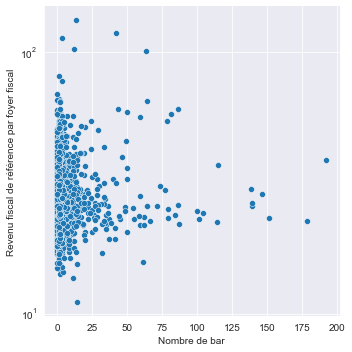

In [77]:
g = sns.relplot(data=nbBar_revenu_byCp, x='Nombre de bar', y='Revenu fiscal de référence par foyer fiscal')
g.set(yscale='log')  # same, without the log scale we cannot see anything

In [78]:
import plotly.express as px

figure = px.density_mapbox(data_bars, lat='Latitude', lon='Longitude', z='Département', radius=10,
                           zoom=4.6, center={"lat": 47, "lon": 2},
                           mapbox_style="stamen-terrain")
figure.show()